In [63]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import odeint

%matplotlib inline

In [64]:
"""Initial parameter functions"""
def seperation_angle(n):
    return ( (2*math.pi)/n )

def setup_radius(sep, diam, PHI):
    return ( (sep + diam)/(2 * math.sin(PHI/2)) )

def cog_length( Rp, PHI, width):
    r = (Rp*math.sin(PHI) - width)/(2*math.sin(PHI/2))
    return r

def width( Rp, PHI):
    w = ( Rp*math.sin(PHI) )/2
    return w

def volume( Rp, r, w, thc, p): #volume of segment
    V = ( ((math.pi*( (Rp**2) - ((Rp-r)**2) ))/p) - r*w ) * thc
    return V

def mass( volume, density): #mass of fluid in segment
    M = volume * density
    return M

def number(mass, atm): #number of fluid particles in segment
    N = mass/atm
    return N

In [54]:
def siggy( kb, T, m): #sigma for M-B distribtuion
    sig = math.sqrt( (kb*T*(3*math.pi - 8))/(m*math.pi) )
    return sig

def speed_distribution(m, kb, T, v): #M-B distribution
    fv = (( (m)/(2*math.pi*kb*T) )**1.5) * 4*math.pi*(v**2)*math.exp( (-m*(v**2))/(2*kb*T) )
    return fv

def rand_speed(sd): #generates random speed
    boundary = 3*sd
    rsp = random.uniform( -boundary, boundary )
    return rsp

def rand_fv( kb, T, m): #generates random number between 0 and peak of M-B distribution
    vp = math.sqrt((2*kb*T)/(m))
    fvm = speed_distribution(m, kb, T, vp)
    rfv = random.uniform( 0, fvm )
    return rfv

def direction( v ): #generates random direction, amends speed to velocity component along axis
    angle1 = random.uniform( 0, 2*math.pi )
    angle2 = random.uniform( 0, math.pi )
    vf = v*math.sin(angle1)*math.sin(angle2)
    return vf

def momentum (m, v): #calculates momentum of particle along axis
    p = m*v
    return p

In [59]:
"""Material dependant constants:"""
'''Fluid'''
fluid_density = 0.164 #helium
atm = 4.002602 * 1.6605402e-27 #helium atomic mass
pressure = 101.325e3
temp = 298.15
A1 = 1.277
kb = 1.38064852e-23 

In [60]:
"""Initial parameters:"""
'''QDs'''
diam = 10e-9 #diameter of QDs [m]
sep = 130e-9 #seperation of QDs [m] (corresponds to motor dead zone)
n = 200   #number of QDs [no unit]
PHI = seperation_angle(n) #angle of seperation between QDs
R = setup_radius(sep, diam, PHI)  #radius of QD setup [m] 5.36290830288e-07
'''Inner section'''
p = int(n/2)   #number of permanent charges (PCs) [no unit]
r0 = 110e-9
Rp = R - r0   #radius of rotating disc [m]
w = width( Rp, PHI )#cog "tooth"/capacitor arm width [m]
r = cog_length( Rp, PHI, w)    #length of the cog shaft [m]
thc = 30e-9   #approximate thickeness of inner disc [m]
V = volume( Rp, r, w, thc, p)
M = mass(V, fluid_density)
number_of_particles = int( number(M, atm) )
print (number_of_particles)


219677


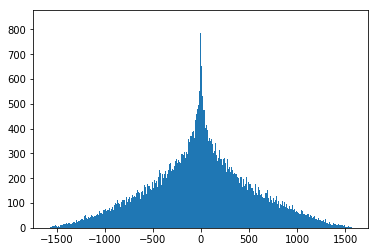

In [70]:
v_list = []
sd = siggy( kb, temp, atm)
for i in np.arange(0, number_of_particles):
    #print(i)
    v=0
    v = rand_speed(sd)
    fv = speed_distribution(atm, kb, temp, v) #probability of particle having speed v
    rfv = rand_fv(kb, temp, atm) #random number between 0 and peak probability
    if (rfv <= fv): #if random number <= probability of v, than accept v
        vdirection = direction( v ) #generate direction
        v_list.append( vdirection )
plt.hist( v_list, 1000)
plt.show()